In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('US_Accidents_Dec20.csv')
print("The shape of data is:",(df.shape))
display(df.head(3))

The shape of data is: (4232541, 49)


,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day


#Split 'Start_Time' attributes

In [3]:
#split 'Start-Time attribute into Year,month,weekday,day,hours and minutes'
df["Start_Time"] = pd.to_datetime(df["Start_Time"])
df["Hour"] = df["Start_Time"].dt.hour
df["Minute"] = df["Start_Time"].dt.minute
df["Year"] = df["Start_Time"].dt.year
df["Month"] = df["Start_Time"].dt.month
df["Weekday"] = df["Start_Time"].dt.weekday
df["Day"] = df["Start_Time"].dt.day
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Hour,Minute,Year,Month,Weekday,Day
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,Night,Night,Night,Night,5,46,2016,2,0,8
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,Night,Night,Night,Day,6,7,2016,2,0,8
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,Night,Night,Day,Day,6,49,2016,2,0,8
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,Night,Day,Day,Day,7,23,2016,2,0,8
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,Day,Day,Day,Day,7,39,2016,2,0,8


In [4]:
df.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Hour', 'Minute', 'Year', 'Month', 'Weekday',
       'Day'],
      dtype='object')

#Dropping unwanted attributes

In [5]:
#After Exploratory Data Analysis we found that there are few feature that can be dropped based on least significance and redundant atrributes , so that model can be trained on cleaned dataset.
least_Significant_features_to_drop = ["ID", "Source", "TMC", "Start_Time", "End_Time", "End_Lat", "End_Lng", 
                                      "Description", "Number", "Street", "County", "State", "Zipcode", "Country", 
                                      "Timezone", "Airport_Code", "Weather_Timestamp", "Wind_Chill(F)", "Turning_Loop"
                                      , "Sunrise_Sunset", "Nautical_Twilight", "Astronomical_Twilight"]
#newSet = df.drop(least_Significant_features_to_drop, axis=1)
df = df.drop(least_Significant_features_to_drop, axis=1)
#newSet.head()
df.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),Side,City,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),...,Stop,Traffic_Calming,Traffic_Signal,Civil_Twilight,Hour,Minute,Year,Month,Weekday,Day
0,3,39.865147,-84.058723,0.01,R,Dayton,36.9,91.0,29.68,10.0,...,False,False,False,Night,5,46,2016,2,0,8
1,2,39.928059,-82.831184,0.01,L,Reynoldsburg,37.9,100.0,29.65,10.0,...,False,False,False,Night,6,7,2016,2,0,8
2,2,39.063148,-84.032608,0.01,R,Williamsburg,36.0,100.0,29.67,10.0,...,False,False,True,Night,6,49,2016,2,0,8
3,3,39.747753,-84.205582,0.01,R,Dayton,35.1,96.0,29.64,9.0,...,False,False,False,Day,7,23,2016,2,0,8
4,2,39.627781,-84.188354,0.01,R,Dayton,36.0,89.0,29.65,6.0,...,False,False,True,Day,7,39,2016,2,0,8


#Data Preprocessing:

In [6]:
#Now we will check if data has some duplicates value and remove them from the dataset
print("Total Number of rows:", len(df.index))
#newSet.drop_duplicates(inplace=True)
df.drop_duplicates
print("Total number of rows after removing duplicates:", len(df.index))

Total Number of rows: 4232541
Total number of rows after removing duplicates: 4232541


In [7]:
#Handling incorrect and missing values

In [8]:
#initially looking at the Side column
df["Side"].value_counts()

R    3467079
L     765461
           1
Name: Side, dtype: int64

In [9]:
#the output shows 1 record without Side so that can be dropped
df = df[df["Side"] != " "]
df["Side"].value_counts()

R    3467079
L     765461
Name: Side, dtype: int64

In [10]:
#next looking at visibility and pressure
df[["Visibility(mi)", "Pressure(in)"]].describe().round(2)

,Visibility(mi),Pressure(in)
count,4133872.00,4156156.00
mean,9.11,29.69
std,2.82,0.86
min,0.00,0.00
25%,10.00,29.64
50%,10.00,29.93
75%,10.00,30.08
max,140.00,58.04


In [11]:
#the output shows min as 0 which informs us that a number of records are missing them and have been replaced with 0
#we are dropping the records with missing values for visibility and pressure

df = df[df["Visibility(mi)"] != 0]
df = df[df["Pressure(in)"] != 0]
df[["Visibility(mi)", "Pressure(in)"]].describe().round(2)

,Visibility(mi),Pressure(in)
count,4131229.00,4153515.00
mean,9.12,29.69
std,2.81,0.86
min,0.06,0.02
25%,10.00,29.64
50%,10.00,29.93
75%,10.00,30.08
max,140.00,58.04


In [12]:
#analyzing the weather conditions
#outputting the total number of different conditions and their names

weather_conditions = df["Weather_Condition"].unique()
print("Total number of weather conditions: ", len(weather_conditions), "\n")
print(weather_conditions)

Total number of weather conditions:  132 

['Light Rain' 'Overcast' 'Mostly Cloudy' 'Rain' 'Light Snow' 'Haze'
 'Scattered Clouds' 'Partly Cloudy' 'Clear' 'Snow'
 'Light Freezing Drizzle' 'Light Drizzle' 'Fog' 'Shallow Fog' 'Heavy Rain'
 'Light Freezing Rain' 'Cloudy' 'Drizzle' nan 'Light Rain Showers' 'Mist'
 'Smoke' 'Patches of Fog' 'Light Freezing Fog' 'Light Haze'
 'Light Thunderstorms and Rain' 'Thunderstorms and Rain' 'Fair'
 'Volcanic Ash' 'Blowing Sand' 'Blowing Dust / Windy' 'Widespread Dust'
 'Fair / Windy' 'Rain Showers' 'Mostly Cloudy / Windy'
 'Light Rain / Windy' 'Hail' 'Heavy Drizzle' 'Showers in the Vicinity'
 'Thunderstorm' 'Light Rain Shower' 'Light Rain with Thunder'
 'Partly Cloudy / Windy' 'Thunder in the Vicinity' 'T-Storm'
 'Heavy Thunderstorms and Rain' 'Thunder' 'Heavy T-Storm' 'Funnel Cloud'
 'Heavy T-Storm / Windy' 'Blowing Snow' 'Light Thunderstorms and Snow'
 'Heavy Snow' 'Low Drifting Snow' 'Light Ice Pellets' 'Ice Pellets'
 'Squalls' 'N/A Precipitation' '

In [13]:
#reducing the amount of weather conditions by substituting them with a more common name

df.loc[df["Weather_Condition"].str.contains("Hail|Pellets", na=False), "Weather_Condition"] = "Hail"
df.loc[df["Weather_Condition"].str.contains("Mist|Haze|Fog", na=False), "Weather_Condition"] = "Fog"
df.loc[df["Weather_Condition"].str.contains("Wind|Squalls", na=False), "Weather_Condition"] = "Windy"
df.loc[df["Weather_Condition"].str.contains("Cloud|Overcast", na=False), "Weather_Condition"] = "Cloudy"
df.loc[df["Weather_Condition"].str.contains("Snow|Sleet|Wintry", na=False), "Weather_Condition"] = "Snow"
df.loc[df["Weather_Condition"].str.contains("Rain|Drizzle|Shower", na=False), "Weather_Condition"] = "Rain"
df.loc[df["Weather_Condition"].str.contains("Sand|Dust", na=False), "Weather_Condition"] = "Sand"
df.loc[df["Weather_Condition"].str.contains("Fair", na=False), "Weather_Condition"] = "Clear"
df.loc[df["Weather_Condition"].str.contains("Smoke|Volcanic Ash", na=False), "Weather_Condition"] = "Smoke"
df.loc[df["Weather_Condition"].str.contains("Thunder|T-Storm", na=False), "Weather_Condition"] = "Thunderstorm"
df.loc[df["Weather_Condition"].str.contains("N/A Precipitation", na=False), "Weather_Condition"] = np.nan

common_weather = df["Weather_Condition"].unique()
print("Total number of weather conditions: ", len(common_weather), "\n")
print(common_weather)

Total number of weather conditions:  12 

['Rain' 'Cloudy' 'Snow' 'Fog' 'Clear' nan 'Smoke' 'Sand' 'Windy' 'Hail'
 'Thunderstorm' 'Tornado']


In [14]:
#after checking the weather conditions, we are analyzing the wind directions
#outputting the total number of different directions and their names

wind_directions = df["Wind_Direction"].unique()
print("Total number of wind directions: ", len(wind_directions), "\n")
print(wind_directions)

Total number of wind directions:  25 

['Calm' 'SW' 'SSW' 'WSW' 'WNW' 'NW' 'West' 'NNW' 'NNE' 'South' 'North'
 'Variable' 'SE' 'SSE' 'ESE' 'East' 'NE' 'ENE' 'E' 'W' nan 'S' 'VAR'
 'CALM' 'N']


In [15]:
#similarly to weather conditions, we reduce the amount of wind directions by grouping the values

df.loc[df["Wind_Direction"] == "North", "Wind_Direction"] = "N"
df.loc[df["Wind_Direction"] == "East", "Wind_Direction"] = "E"
df.loc[df["Wind_Direction"] == "South", "Wind_Direction"] = "S"
df.loc[df["Wind_Direction"] == "West", "Wind_Direction"] = "W"
df.loc[df["Wind_Direction"] == "CALM", "Wind_Direction"] = "Calm"
df.loc[df["Wind_Direction"] == "VAR", "Wind_Direction"] = "Variable"
df["Wind_Direction"] = df["Wind_Direction"].map(lambda i : i if len(i) != 3 else i[1:], na_action="ignore")
common_direction = df["Wind_Direction"].unique()

print("Total number of wind directions: ", len(common_direction), "\n")
print(common_direction)

Total number of wind directions:  11 

['Calm' 'SW' 'NW' 'W' 'NE' 'S' 'N' 'Variable' 'SE' 'E' nan]


In [16]:
#analyzing the missing values
df.isna().sum()

Severity                   0
Start_Lat                  0
Start_Lng                  0
Distance(mi)               0
Side                       0
City                     137
Temperature(F)         89873
Humidity(%)            95422
Pressure(in)           76381
Visibility(mi)         98667
Wind_Direction         83601
Wind_Speed(mph)       479284
Precipitation(in)    2065296
Weather_Condition      99024
Amenity                    0
Bump                       0
Crossing                   0
Give_Way                   0
Junction                   0
No_Exit                    0
Railway                    0
Roundabout                 0
Station                    0
Stop                       0
Traffic_Calming            0
Traffic_Signal             0
Civil_Twilight           141
Hour                       0
Minute                     0
Year                       0
Month                      0
Weekday                    0
Day                        0
dtype: int64

In [17]:
#from the output, we identified that many of the records don't contain informations about Precipitation so we will drop that feature
#we fill in the missing features with the mean for numerical features 
#we delete the records with missing informations for categorical features
fill_features = ["Temperature(F)", "Humidity(%)", "Pressure(in)", "Visibility(mi)", "Wind_Speed(mph)", "Precipitation(in)"]
df[fill_features] = df[fill_features].fillna(df[fill_features].mean())
df.dropna(inplace=True)
df.isna().sum()

Severity             0
Start_Lat            0
Start_Lng            0
Distance(mi)         0
Side                 0
City                 0
Temperature(F)       0
Humidity(%)          0
Pressure(in)         0
Visibility(mi)       0
Wind_Direction       0
Wind_Speed(mph)      0
Precipitation(in)    0
Weather_Condition    0
Amenity              0
Bump                 0
Crossing             0
Give_Way             0
Junction             0
No_Exit              0
Railway              0
Roundabout           0
Station              0
Stop                 0
Traffic_Calming      0
Traffic_Signal       0
Civil_Twilight       0
Hour                 0
Minute               0
Year                 0
Month                0
Weekday              0
Day                  0
dtype: int64

In [18]:
#Encode target labels with value between 0 and n_classes-1
encoder = preprocessing.LabelEncoder()
df['Bump'] = encoder.fit_transform(df['Bump'])
df['Amenity'] = encoder.fit_transform(df['Amenity'])
df['Crossing'] = encoder.fit_transform(df['Crossing'])
df['Give_Way'] = encoder.fit_transform(df['Give_Way'])
df['Junction'] = encoder.fit_transform(df['Junction'])
df['No_Exit'] = encoder.fit_transform(df['No_Exit'])
df['Railway'] = encoder.fit_transform(df['Railway'])
df['Roundabout'] = encoder.fit_transform(df['Roundabout'])
df['Station'] = encoder.fit_transform(df['Station'])
df['Stop'] = encoder.fit_transform(df['Stop'])
df['Traffic_Calming'] = encoder.fit_transform(df['Traffic_Calming'])
df['Traffic_Signal'] = encoder.fit_transform(df['Traffic_Signal'])
df['City'] = encoder.fit_transform(df['City'])
df['Weather_Condition'] = encoder.fit_transform(df['Weather_Condition'])
df['Wind_Direction'] = encoder.fit_transform(df['Wind_Direction'])
df['Side'] = encoder.fit_transform(df['Side'])
df['Civil_Twilight'] = encoder.fit_transform(df['Civil_Twilight'])

In [19]:
df.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),Side,City,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),...,Stop,Traffic_Calming,Traffic_Signal,Civil_Twilight,Hour,Minute,Year,Month,Weekday,Day
0,3,39.865147,-84.058723,0.01,1,2577,36.9,91.0,29.68,10.0,...,0,0,0,1,5,46,2016,2,0,8
1,2,39.928059,-82.831184,0.01,0,8978,37.9,100.0,29.65,10.0,...,0,0,0,1,6,7,2016,2,0,8
2,2,39.063148,-84.032608,0.01,1,11741,36.0,100.0,29.67,10.0,...,0,0,1,1,6,49,2016,2,0,8
3,3,39.747753,-84.205582,0.01,1,2577,35.1,96.0,29.64,9.0,...,0,0,0,0,7,23,2016,2,0,8
4,2,39.627781,-84.188354,0.01,1,2577,36.0,89.0,29.65,6.0,...,0,0,1,0,7,39,2016,2,0,8


#Displaying number of records in each Severity

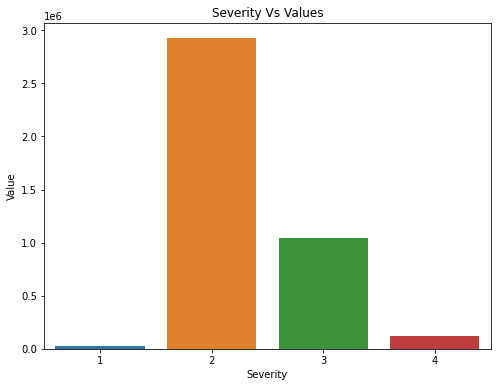

In [20]:
severityCount = df['Severity'].value_counts()
plt.figure(figsize=(8, 6))
plt.title("Severity Vs Values")
sns.barplot(severityCount.index, severityCount.values)
plt.xlabel("Severity")
plt.ylabel("Value")
plt.show()

In [21]:
#Data distribution is not uniform, we number of records for each severity

In [22]:
size1 = len(df[df["Severity"]==1].index)
print('No. of rows in Severity 1: ',size1 )
size2 = len(df[df["Severity"]==2].index)
print('No. of rows in Severity 2: ',size2)
size3 = len(df[df["Severity"]==3].index)
print('No. of rows in Severity 3: ',size3)
size4 = len(df[df["Severity"]==4].index)
print('No. of rows in Severity 4: ',size4)

No. of rows in Severity 1:  28718
No. of rows in Severity 2:  2925644
No. of rows in Severity 3:  1043246
No. of rows in Severity 4:  119248


In [23]:
X = pd.DataFrame()
#We take all the records for severity 1
for i in range(1,2):
    S = df[df['Severity']==i]
    temp = S.sample(size1, random_state=42)
    X = X.append(temp)

In [24]:
#We take all the records for severity 4
for i in range(4,5):
    S = df[df['Severity']==i]
    temp = S.sample(size4, random_state=42)
    X = X.append(temp)

In [25]:
#We take all the records for severity 3 & same size of records for severity 2
for i in range(2,4):
    S = df[df['Severity']==i]
    temp = S.sample(size3, random_state=42)
    X = X.append(temp)

#Reducing no. of records for further processing

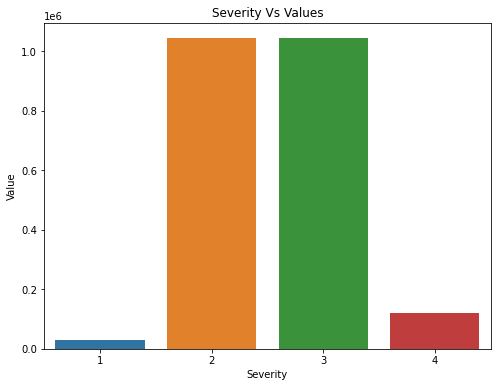

In [26]:
severityCount = X['Severity'].value_counts()
plt.figure(figsize=(8, 6))
plt.title("Severity Vs Values")
sns.barplot(severityCount.index, severityCount.values)
plt.xlabel("Severity")
plt.ylabel("Value")
plt.show()

In [27]:
print("Size of data taken for analysis ", X.shape)
X.columns

Size of data taken for analysis  (2234458, 33)


Index(['Severity', 'Start_Lat', 'Start_Lng', 'Distance(mi)', 'Side', 'City',
       'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Civil_Twilight', 'Hour', 'Minute',
       'Year', 'Month', 'Weekday', 'Day'],
      dtype='object')

#Scaling the features using MinMaxScaler

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
featuresForScaling = ['Start_Lat', 'Start_Lng','Distance(mi)','Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)','Wind_Speed(mph)', 'Precipitation(in)','Hour', 'Minute',
       'Year', 'Month', 'Weekday', 'Day', 'City', 'Wind_Direction', 'Weather_Condition']
X[featuresForScaling] = scaler.fit_transform(X[featuresForScaling])
X.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),Side,City,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),...,Stop,Traffic_Calming,Traffic_Signal,Civil_Twilight,Hour,Minute,Year,Month,Weekday,Day
3608693,1,0.550071,0.043328,0.000000,1,0.180768,0.492806,0.676768,0.516201,0.07103,...,0,0,0,1,0.000000,0.661017,1.0,0.272727,0.500000,0.033333
3557570,1,0.317206,0.235195,0.000000,1,0.904255,0.672662,0.030303,0.465701,0.07103,...,0,0,1,0,0.826087,0.322034,1.0,0.454545,0.666667,0.600000
3598039,1,0.315379,0.237577,0.000007,0,0.904255,0.507194,0.383838,0.467942,0.07103,...,0,0,1,0,0.478261,0.711864,1.0,0.181818,0.666667,0.866667
3511994,1,0.462211,0.773903,0.000000,1,0.886386,0.618705,0.494949,0.502068,0.07103,...,0,0,0,0,0.652174,0.254237,1.0,0.454545,0.333333,0.766667
3583845,1,0.514955,0.044404,0.000000,1,0.508644,0.510791,0.686869,0.519304,0.07103,...,0,0,0,0,0.391304,0.406780,1.0,0.181818,0.666667,0.633333


In [29]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2234458 entries, 3608693 to 341042
Data columns (total 33 columns):
Severity             int64
Start_Lat            float64
Start_Lng            float64
Distance(mi)         float64
Side                 int64
City                 float64
Temperature(F)       float64
Humidity(%)          float64
Pressure(in)         float64
Visibility(mi)       float64
Wind_Direction       float64
Wind_Speed(mph)      float64
Precipitation(in)    float64
Weather_Condition    float64
Amenity              int64
Bump                 int64
Crossing             int64
Give_Way             int64
Junction             int64
No_Exit              int64
Railway              int64
Roundabout           int64
Station              int64
Stop                 int64
Traffic_Calming      int64
Traffic_Signal       int64
Civil_Twilight       int64
Hour                 float64
Minute               float64
Year                 float64
Month                float64
Weekday      

#Decision Tree

In [36]:
# Train - Test split 
#new
X, X_test_data = train_test_split(X, test_size=.2, random_state=42)
print(X.shape, X_test_data.shape)

(1787566, 33) (446892, 33)


In [30]:
#Decision Tree
sampleSet = X
Y = sampleSet["Severity"]
X_sample = sampleSet.drop("Severity", axis=1)

In [31]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X_sample, Y, random_state=42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(1675843, 32) (1675843,)
(558615, 32) (558615,)


In [32]:
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer
clf = DecisionTreeClassifier(random_state=42)

#Train the classifier
parameter = [{"criterion":["gini", "entropy"], "max_depth": [5,10,15,30]}]

#cross-validated grid-search
gridSearch = GridSearchCV(clf,parameter,verbose = 5,n_jobs=-1)
gridSearch.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  40 | elapsed:  1.4min remaining:  1.8min
[Parallel(n_jobs=-1)]: Done  27 out of  40 | elapsed:  2.2min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  36 out of  40 | elapsed:  2.7min remaining:   17.9s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  2.9min finished


GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [5, 10, 15, 30]}],
             verbose=5)

In [33]:
#Print parameter score
print("Parameter score using GridSearchCV in sklearn")
print("Parameter score: ",gridSearch.best_params_)
print("Training score: ",gridSearch.score(X_train, y_train))
print("Test score: ",gridSearch.score(X_test, y_test))

Parameter score using GridSearchCV in sklearn
Parameter score:  {'criterion': 'gini', 'max_depth': 30}
Training score:  0.9652718064878393
Test score:  0.7867260993707652


In [34]:
#Print parameter score
print("Scoring only using the decision tree classifier")
clf.fit(X_train,y_train)
print("Training score: ",clf.score(X_train, y_train))
print("Test score: ",clf.score(X_test, y_test))

Scoring only using the decision tree classifier
Training score:  0.9992660410312899
Test score:  0.7785952758160808


In [35]:
accuracy = dict()
f1 = dict()
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
y_pred_dt = clf.predict(X_test)
accuracy['Decision Tree']=metrics.accuracy_score(y_test, y_pred_dt)
f1['Decision Tree'] = f1_score(y_test, y_pred_dt, average="macro")
print("Accuracy of Decision Tree:",accuracy['Decision Tree'])

Accuracy of Decision Tree: 0.7785952758160808


In [36]:
print(classification_report(y_train, clf.predict(X_train)))
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     21549
           2       1.00      1.00      1.00    782439
           3       1.00      1.00      1.00    782340
           4       1.00      0.99      0.99     89515

    accuracy                           1.00   1675843
   macro avg       1.00      1.00      1.00   1675843
weighted avg       1.00      1.00      1.00   1675843

              precision    recall  f1-score   support

           1       0.58      0.62      0.60      7169
           2       0.80      0.79      0.80    260807
           3       0.80      0.80      0.80    260906
           4       0.49      0.51      0.50     29733

    accuracy                           0.78    558615
   macro avg       0.67      0.68      0.67    558615
weighted avg       0.78      0.78      0.78    558615



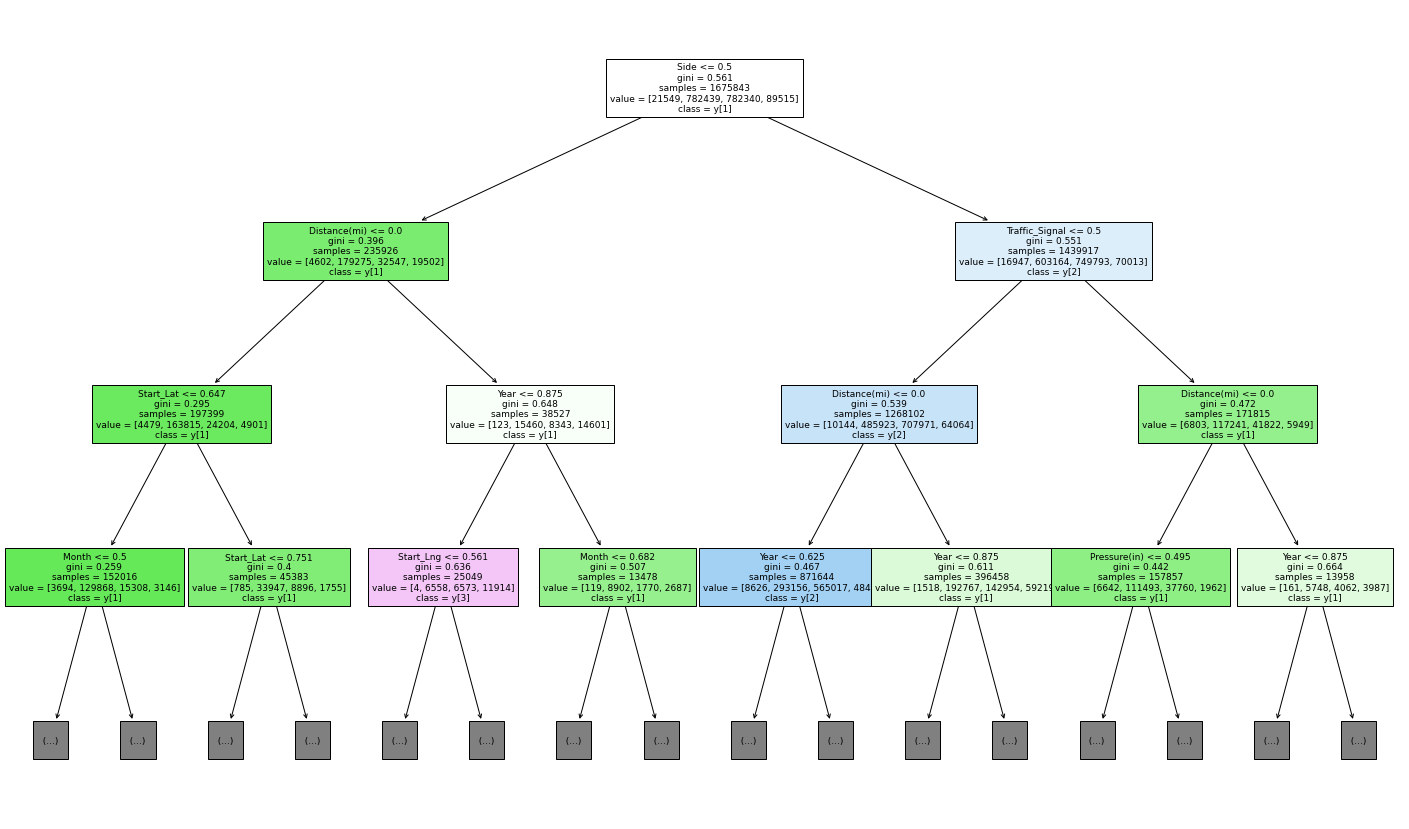

In [37]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
fig, axes = plt.subplots(figsize = (25,15))
plot_tree(clf,max_depth=3,fontsize=9,feature_names=X_train.columns.to_list(),class_names=True,filled = True)
fig.savefig('DecisionTree.png')

In [37]:
sam_Data = X
y_data = sam_Data["Severity"]
X_data = sam_Data.drop("Severity", axis=1)

X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, random_state=42)

#Gaussian Naive Bayes classifier

In [38]:
#Gaussian Naive Bayes classfier

from sklearn.naive_bayes import  GaussianNB
gausNaiveB = GaussianNB()
gausNaiveB.fit(X_train, y_train)

print("Training score:", gausNaiveB.score(X_train, y_train))
print("Validation score:", gausNaiveB.score(X_val, y_val))

Training score: 0.5660779578033138
Validation score: 0.5662576192905668


In [39]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
y_pred_nb = gausNaiveB.predict(X_val)

print(classification_report(y_train, gausNaiveB.predict(X_train)))
print(classification_report(y_val, y_pred_nb))

              precision    recall  f1-score   support

           1       0.15      0.41      0.22     17266
           2       0.78      0.29      0.42    625720
           3       0.55      0.90      0.68    625832
           4       0.22      0.12      0.15     71856

    accuracy                           0.57   1340674
   macro avg       0.42      0.43      0.37   1340674
weighted avg       0.64      0.57      0.53   1340674

              precision    recall  f1-score   support

           1       0.15      0.43      0.22      5712
           2       0.78      0.28      0.42    208576
           3       0.55      0.90      0.68    208950
           4       0.22      0.12      0.15     23654

    accuracy                           0.57    446892
   macro avg       0.43      0.43      0.37    446892
weighted avg       0.64      0.57      0.53    446892



In [41]:
# Model Accuracy, how often is the classifier correct
from sklearn import metrics
accuracy['Naive Bayes'] = metrics.accuracy_score(y_val, y_pred_nb)
print("Accuracy of NB:",accuracy['Naive Bayes'])
f1['Naive Bayes'] = f1_score(y_val, y_pred_nb, average="macro")

NameError: name 'accuracy' is not defined

#Random Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier
rand_Forest = RandomForestClassifier(n_jobs=-1, random_state=42)
grid = [{"n_estimators": [200], "max_depth": [30]}]
clf_rand_For = GridSearchCV(rand_Forest, grid, verbose=5, n_jobs=-1)
clf_rand_For.fit(X_train, y_train)

print("Best parameters scores:")
print(clf_rand_For.best_params_)
print("Train score:", clf_rand_For.score(X_train, y_train))
print("Validation score:", clf_rand_For.score(X_val, y_val))

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed: 16.5min remaining: 24.8min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 16.5min finished


Best parameters scores:
{'max_depth': 30, 'n_estimators': 200}
Train score: 0.9512997339249559
Validation score: 0.7873830813708905


In [42]:
rand_Forest.fit(X_train,y_train)

y_pred_rand_Forest=rand_Forest.predict(X_val)

In [43]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_val, y_pred_rand_Forest))  
print(classification_report(y_val, y_pred_rand_Forest))
# Model Accuracy, how often is the classifier correct?
accuracy['Random Forest'] =metrics.accuracy_score(y_val, y_pred_rand_Forest)
print("Accuracy:",accuracy['Random Forest'])
f1['Random Forest'] = f1_score(y_val, y_pred_rand_Forest, average="macro")

[[  4159   1891   1077     42]
 [   644 202157  55981   2025]
 [   283  35212 223050   2361]
 [    37   5943   9590  14163]]
              precision    recall  f1-score   support

           1       0.81      0.58      0.68      7169
           2       0.82      0.78      0.80    260807
           3       0.77      0.85      0.81    260906
           4       0.76      0.48      0.59     29733

    accuracy                           0.79    558615
   macro avg       0.79      0.67      0.72    558615
weighted avg       0.80      0.79      0.79    558615

Accuracy: 0.7939797534974893


#Logistic Regression

In [46]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix  
Log_reg = LogisticRegression(solver='lbfgs', max_iter=4000)
Log_reg.fit(X_train, y_train)
y_pred_Log_reg = Log_reg.predict(X_val)
print(confusion_matrix(y_val, y_pred_Log_reg))  
print(classification_report(y_val, y_pred_Log_reg))

[[   667   3426   1617      2]
 [   172 127372  80937     95]
 [    48  45573 162772    557]
 [    22   9187  14181    264]]
              precision    recall  f1-score   support

           1       0.73      0.12      0.20      5712
           2       0.69      0.61      0.65    208576
           3       0.63      0.78      0.69    208950
           4       0.29      0.01      0.02     23654

    accuracy                           0.65    446892
   macro avg       0.58      0.38      0.39    446892
weighted avg       0.64      0.65      0.63    446892



In [47]:
print(" Train score:", Log_reg.score(X_train, y_train))
print("Validation score:", Log_reg.score(X_val, y_val))

 Train score: 0.6516035964000197
Validation score: 0.6513318654171477


In [44]:
#logistic regression with GridSearchCV

logistic_regres = LogisticRegression(random_state=42, n_jobs=-1)
params = {"solver": ["newton-cg", "sag", "saga"]}
grid = GridSearchCV(logistic_regres, params, n_jobs=-1, verbose=5)
grid.fit(X_train, y_train)

print("Best parameters scores:")
print(grid.best_params_)
print("Train score witg Grid search:", grid.score(X_train, y_train))
print("Validation score with grid search:", grid.score(X_val, y_val))

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:  1.4min remaining:  3.9min
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:  2.8min remaining:  2.5min
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:  9.3min remaining:  2.3min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 10.6min finished


Best parameters scores:
{'solver': 'sag'}
Train score witg Grid search: 0.6516162765892379
Validation score with grid search: 0.6512647351037835


In [46]:
accuracy['Logistic regression'] = metrics.accuracy_score(y_test, y_pred_Log_reg)
print("Accuracy of Logistic Regression classifier:",accuracy['Logistic regression'])
f1['Logistic regression'] = f1_score(y_test, y_pred_Log_reg, average="macro")

Accuracy of Logistic Regression classifier: 0.6522757176230498


#Support Vector Machines

In [47]:
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

In [48]:
param = [{"kernel": ["linear", "rbf", "sigmoid"], "C": [.2, .5, .8, 1.]}, 
         {"kernel": ["poly"], "C": [.2, .5, .8, 1.], "degree": [2, 3, 4]}]

svm_svc = svm.SVC(verbose=5, random_state=42)
grid_search = GridSearchCV(svm_svc, param, verbose=5, n_jobs=-1)

x, x_test = train_test_split(X, test_size=.2, random_state=42)
print("train test split: ", x.shape, x_test.shape)

train test split:  (1787566, 33) (446892, 33)


In [49]:
smpl = x.sample(5_000, random_state=42)
y_smpl = smpl["Severity"]
x_smpl = smpl.drop("Severity", axis=1)
grid_search.fit(x_smpl, y_smpl)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 114 out of 120 | elapsed:   14.9s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   15.5s finished


[LibSVM]

GridSearchCV(estimator=SVC(random_state=42, verbose=5), n_jobs=-1,
             param_grid=[{'C': [0.2, 0.5, 0.8, 1.0],
                          'kernel': ['linear', 'rbf', 'sigmoid']},
                         {'C': [0.2, 0.5, 0.8, 1.0], 'degree': [2, 3, 4],
                          'kernel': ['poly']}],
             verbose=5)

In [50]:
print("top scores of parameters:", grid_search.best_params_)
print("train score:", grid_search.score(x_smpl, y_smpl))

top scores of parameters: {'C': 1.0, 'degree': 3, 'kernel': 'poly'}
train score: 0.6798


In [51]:
print("default scores:", svm_svc.fit(x_smpl, y_smpl))
print("train score:", svm_svc.score(x_smpl, y_smpl))

[LibSVM]default scores: SVC(random_state=42, verbose=5)
train score: 0.6698


In [52]:
#pd.DataFrame(grid_search.cv_results_).sort_values(by = "rank_test_score")

In [53]:
smpl = x.sample(10_000, random_state = 42)
y_smpl = smpl["Severity"]
x_smpl = smpl.drop("Severity", axis=1)
x_train, x_val, y_train, y_val = train_test_split(x_smpl, y_smpl, test_size = .2, random_state = 42)

In [54]:
print("train: ", x_train.shape, y_train.shape)
print("validation: ", x_val.shape, y_val.shape)

train:  (8000, 32) (8000,)
validation:  (2000, 32) (2000,)


In [55]:
svm_svc = svm.SVC(**grid_search.best_params_, random_state = 42)
svm_svc.fit(x_train, y_train)

SVC(kernel='poly', random_state=42)

In [56]:
print("train: ", svm_svc.score(x_train, y_train))
print("validation: ", svm_svc.score(x_val, y_val))

train:  0.6805
validation:  0.656


In [57]:
f_1 = dict()
acc = dict()

y_pred = svm_svc.predict(x_val)
acc["SVM"] = accuracy_score(y_val, y_pred)
f_1["SVM"] = f1_score(y_val, y_pred, average = "macro")

In [58]:
print(classification_report(y_train, svm_svc.predict(x_train)))
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           1       0.88      0.27      0.41       107
           2       0.75      0.61      0.67      3789
           3       0.64      0.84      0.72      3687
           4       1.00      0.01      0.01       417

    accuracy                           0.68      8000
   macro avg       0.82      0.43      0.46      8000
weighted avg       0.71      0.68      0.66      8000

              precision    recall  f1-score   support

           1       1.00      0.18      0.31        33
           2       0.73      0.58      0.65       937
           3       0.61      0.84      0.71       907
           4       0.00      0.00      0.00       123

    accuracy                           0.66      2000
   macro avg       0.59      0.40      0.42      2000
weighted avg       0.64      0.66      0.63      2000



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
y_pred = svm_svc.predict(x_val)

'''
c = ["pred severity - 1", "pred severity - 2", "pred severity - 3", "pred severity - 4"]
i = ["actual severity - 1", "actual severity - 2", "actual severity - 3", "actual severity - 4"]
data_mtx = confusion_matrix(y_true=y_val, y_pred=y_pred)
cf_mtx = pd.DataFrame(data = data_mtx, columns = c, index = i)
'''

'\nc = ["pred severity - 1", "pred severity - 2", "pred severity - 3", "pred severity - 4"]\ni = ["actual severity - 1", "actual severity - 2", "actual severity - 3", "actual severity - 4"]\ndata_mtx = confusion_matrix(y_true=y_val, y_pred=y_pred)\ncf_mtx = pd.DataFrame(data = data_mtx, columns = c, index = i)\n'

In [69]:
accuracy['Support Vector Machine'] = metrics.accuracy_score(y_val, y_pred)
print("Accuracy:",accuracy['Support Vector Machine'])
f1['Support Vector Machine'] = f1_score(y_val, y_pred, average="macro")
#print(f1['Support Vector Machine'])

Accuracy: 0.656


In [63]:
#Comparing accuracy of each model

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


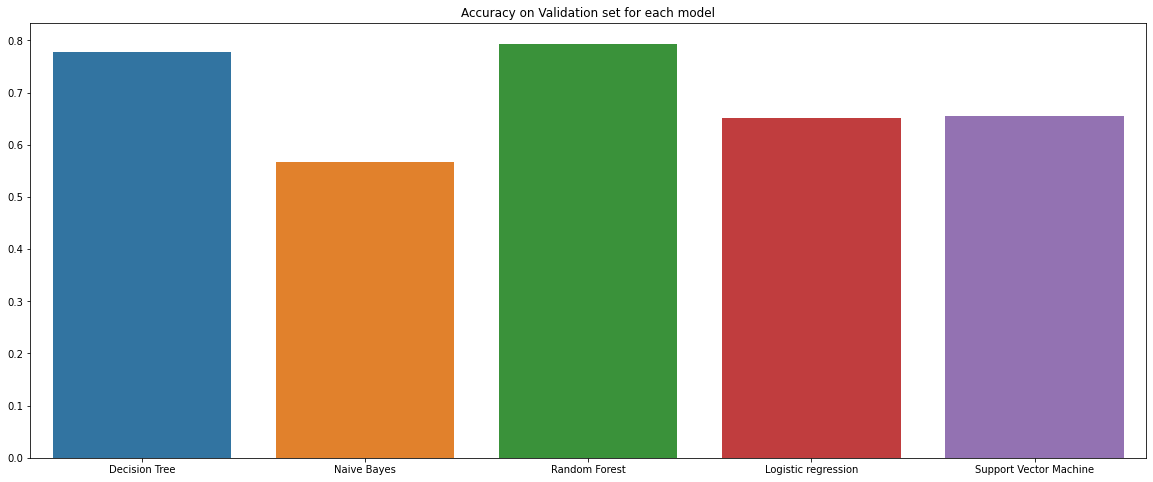

In [64]:
plt.figure(figsize=(20, 8))
plt.title("Accuracy on Validation set for each model")
sns.barplot(list(range(len(accuracy))), list(accuracy.values()))
plt.xticks(range(len(accuracy)), labels=accuracy.keys())
plt.show()

In [72]:
#Comparing f1 score of each model

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


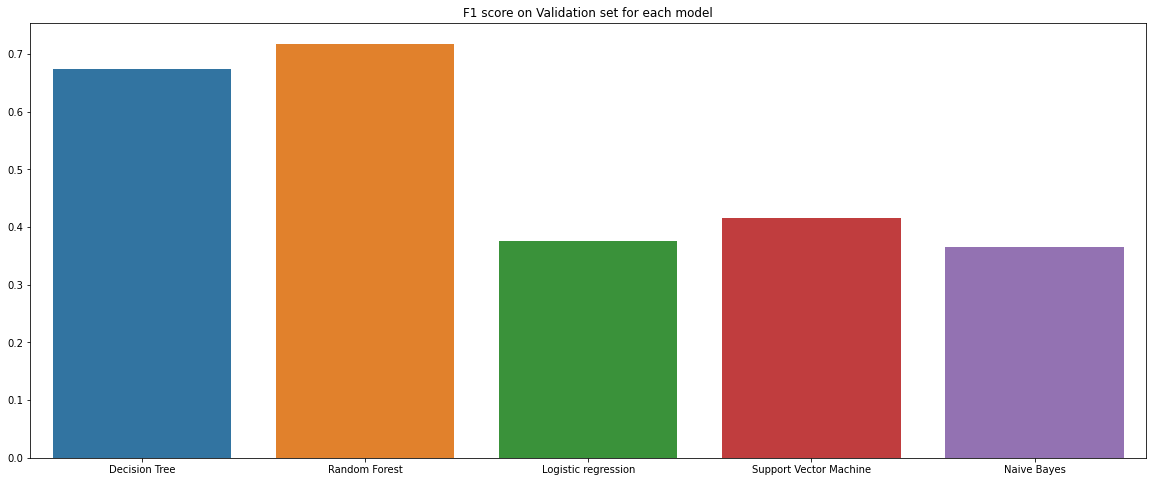

In [73]:
plt.figure(figsize=(20, 8))
plt.title("F1 score on Validation set for each model")
sns.barplot(list(range(len(f1))), list(f1.values()))
plt.xticks(range(len(f1)), labels=f1.keys())
plt.show()

In [ ]:

smpl_test_data = X_test_dataX_test
y_smpl_test_data = smpl_test_data["Severity"]
X_smpl_test_data = smpl_test_data.drop("Severity", axis=1)

y_pred_ran_for = rand_Forest.predict(X_smpl_test_data)

print(classification_report(y_smpl_test_data, y_pred_ran_for))

con_mat = confusion_matrix(y_true=y_smpl_test_data, y_pred=y_pred_ran_for)

print(con_mat)
